In [3]:
# import numpy as np
from sklearn.model_selection import train_test_split   
#import pickle
import math
from sklearn import preprocessing 


#import statements
# from tensorflow import keras
from keras.layers.core import Dense, Activation, Dropout #core layers that used to build the network
from keras.layers.recurrent import LSTM,GRU,SimpleRNN
from keras.models import Sequential, load_model
import time
import pandas as pd #define the data structures
import matplotlib as plt #for visualization
from sklearn.preprocessing import StandardScaler #for normalizing our data(scaling)
import numpy as np #for matrix multiplication
import matplotlib.pyplot as plt

#read the annotated file 
from math import sqrt
from numpy import concatenate 
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
import plotly.offline as py
import plotly.graph_objs as go 
import seaborn as sns
py.init_notebook_mode(connected=True)
import os  
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy
numpy.random.seed(16)

Using TensorFlow backend.


# Training data

In [4]:
# # Training data
df = pd.read_csv(r'./10FBG.csv')
df.head()

df.shape

df.shape# ## Min Max Normalization

# In[688]:


Y=df.iloc[:,-10:] #只取後面四個
X=df.iloc[:,:-10] #不取後面四個

#print (X)
#print (Y)
# conversion to numpy array
x, y = X.values, Y.values  

# scaling values for model 壓縮資料0~1
x_scale = MinMaxScaler(feature_range=(0, 1))
y_scale = MinMaxScaler(feature_range=(0, 1)) 

X = x_scale.fit_transform(x)
Y = y_scale.fit_transform(y)  
print (X)
print(len(X),len(Y))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20) 
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

#print (y_train)
#print (Y)

# In[689]:


X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
#print (X_train)
#print (X_test)


# In[690]:

X_test.shape

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.55474453e-05 2.64035088e-05 2.70680628e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.51824818e-10 3.74561404e-10 3.96335079e-10 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.06738544e-09
  4.76793249e-09 4.48844884e-09]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.69002695e-05
  9.40928270e-05 9.10891089e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]
69 69
(55, 1973) (14, 1973) (55, 10) (14, 10)


(14, 1, 1973)

In [5]:
df.shape

(69, 1983)

# Min Max Normalization

In [6]:
import tensorflow as tf
# from tensorflow.keras import layers
# import tensorflow.compat.v1 as tf
import keras
# from tensorflow import keras
# sess = tf.Session（）
# from tensorflow.keras import backend
# from keras.backend import set_session
from tensorflow.compat.v1.keras.backend import set_session
# from tensorflow import keras
# from keras import backend
# from tensorflow.python import keras
# from keras.backend import set_session
# tf.compat.v1.keras.backend.set_session()
config = tf.compat.v1.ConfigProto()
config.gpu_options.allocator_type = 'BFC' #A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth =True

set_session(tf.compat.v1.Session(config=config)) 
#if gpu fail

In [7]:
from timeit import default_timer as timer
# from keras.models import Sequential
def gru(feature):
    input_shapes=(None, feature)
    
    print(input_shapes)
    model_name = 'FBG sensor_GRU_' 
#     model = Sequential()
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.GRU(units=512, return_sequences=True, input_shape=input_shapes))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.GRU(units=512,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
   
    model.add(tf.keras.layers.Dense(3, activation='relu'))
    #model.add(Dense(4, activation='tanh'))
    #model.add(Dense(4, activation='sigmoid'))
    #model.add(Dense(4, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='tanh'))
    start = time.time()
    
    #model.compile(loss='mse', optimizer='adam',metrics=['accuracy']) 
    model.compile(loss='mse',optimizer='Adamax',metrics=['accuracy'])
    #model.compile(loss='mse', optimizer='sgd',metrics=['accuracy']) 
    #model.compile(loss='mse', optimizer='Adamax',metrics=['accuracy']) 
    return model
start = timer()

# GRU model

In [8]:
# from keras.layers import GRU
# tf.compat.v1.get_default_graph
# from keras.models import Sequential
from keras import models
from keras import layers
model_gru=gru(X_train.shape[2])
model_gru.summary()
##Fitting the LSTM to the Training set
hist_gru=model_gru.fit(X_train, y_train, batch_size=2000, epochs=250, validation_split=0.2, verbose=1)

duration = timer() - start
print('Compilation Time:',duration)

(None, 1973)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 512)         3820032   
_________________________________________________________________
dropout (Dropout)            (None, None, 512)         0         
_________________________________________________________________
gru_1 (GRU)                  (None, 512)               1575936   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 1539      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40        
Total params: 5,397,547
Trainable params: 5,397,547
Non-trainable params: 0
_________________________________

Epoch 51/250
1/1 [==============================] - 0s 67ms/step - loss: 0.0166 - accuracy: 0.9773 - val_loss: 0.0242 - val_accuracy: 1.0000
Epoch 52/250
1/1 [==============================] - 0s 66ms/step - loss: 0.0164 - accuracy: 0.9773 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 53/250
1/1 [==============================] - 0s 65ms/step - loss: 0.0163 - accuracy: 0.9545 - val_loss: 0.0238 - val_accuracy: 1.0000
Epoch 54/250
1/1 [==============================] - 0s 74ms/step - loss: 0.0162 - accuracy: 0.9545 - val_loss: 0.0236 - val_accuracy: 1.0000
Epoch 55/250
1/1 [==============================] - 0s 74ms/step - loss: 0.0160 - accuracy: 0.9545 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 56/250
1/1 [==============================] - 0s 67ms/step - loss: 0.0159 - accuracy: 0.9545 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 57/250
1/1 [==============================] - 0s 64ms/step - loss: 0.0157 - accuracy: 0.9773 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 58/250


1/1 [==============================] - 0s 65ms/step - loss: 0.0097 - accuracy: 0.9545 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 110/250
1/1 [==============================] - 0s 66ms/step - loss: 0.0096 - accuracy: 0.9773 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 111/250
1/1 [==============================] - 0s 68ms/step - loss: 0.0096 - accuracy: 0.9773 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 112/250
1/1 [==============================] - 0s 67ms/step - loss: 0.0095 - accuracy: 0.9773 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 113/250
1/1 [==============================] - 0s 74ms/step - loss: 0.0093 - accuracy: 0.9773 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 114/250
1/1 [==============================] - 0s 74ms/step - loss: 0.0093 - accuracy: 0.9773 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 115/250
1/1 [==============================] - 0s 70ms/step - loss: 0.0092 - accuracy: 0.9773 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 116/250
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.0057 - accuracy: 0.9773 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 167/250
1/1 [==============================] - 0s 73ms/step - loss: 0.0056 - accuracy: 0.9773 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 168/250
1/1 [==============================] - 0s 75ms/step - loss: 0.0056 - accuracy: 0.9773 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 169/250
1/1 [==============================] - 0s 68ms/step - loss: 0.0055 - accuracy: 0.9773 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 170/250
1/1 [==============================] - 0s 66ms/step - loss: 0.0055 - accuracy: 0.9773 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 171/250
1/1 [==============================] - 0s 75ms/step - loss: 0.0054 - accuracy: 0.9773 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 172/250
1/1 [==============================] - 0s 74ms/step - loss: 0.0054 - accuracy: 0.9773 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 173/250
1/1 [=

Epoch 224/250
1/1 [==============================] - 0s 67ms/step - loss: 0.0038 - accuracy: 0.9773 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 225/250
1/1 [==============================] - 0s 67ms/step - loss: 0.0037 - accuracy: 0.9773 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 226/250
1/1 [==============================] - 0s 66ms/step - loss: 0.0038 - accuracy: 0.9773 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 227/250
1/1 [==============================] - 0s 66ms/step - loss: 0.0037 - accuracy: 0.9773 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 228/250
1/1 [==============================] - 0s 67ms/step - loss: 0.0037 - accuracy: 0.9773 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 229/250
1/1 [==============================] - 0s 66ms/step - loss: 0.0036 - accuracy: 0.9773 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 230/250
1/1 [==============================] - 0s 67ms/step - loss: 0.0037 - accuracy: 0.9545 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 

In [9]:
##Fitting the GRU to the Training set


# GRU training and validation loss


No handles with labels found to put in legend.


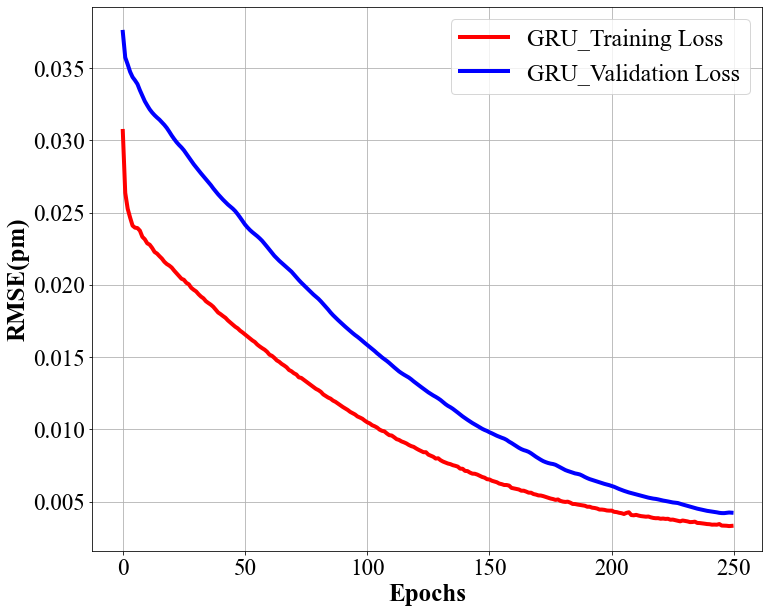

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(12,10))

plt.plot(hist_gru.history['loss'],'red',linewidth=4)
plt.plot(hist_gru.history['val_loss'],'blue',linewidth=4)
plt.ylabel('RMSE(pm)',fontweight='bold', color = 'black', fontsize='25', horizontalalignment='center')
plt.xlabel('Epochs',fontweight='bold', color = 'black', fontsize='25', horizontalalignment='center')
plt.legend(fontsize=16)

plt.legend(['GRU_Training Loss', 'GRU_Validation Loss'],fontsize='24',loc='upper right')
#plt.legend(loc='upper right',fontsize='20')
plt.xticks(fontsize='23')
plt.yticks(fontsize='23')
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22) 
plt.grid()
plt.show()

# Test data


In [16]:
# # Test data

# In[696]:


pred=pd.read_csv(r'./test8.csv')
pred.head()


# In[697]:


X_pred=pred.iloc[:,:-10]
Y_pred=pred.iloc[:,-10:]
X_pred.head()
print(X_pred)
print(Y_pred)


# In[698]:


x_pred, y_pred = X_pred.values, Y_pred.values  

# scaling values for model
x_pred_scale = MinMaxScaler()
y_pred_scale = MinMaxScaler()  

Xx__pred = x_pred_scale.fit_transform(x_pred)
Yy_pred = y_pred_scale.fit_transform(y_pred)  


# In[699]:


pred_x = np.reshape(Xx__pred, (Xx__pred.shape[0], 1, Xx__pred.shape[1])) 
pred_x


              0             1             2             3             4  \
0  1.300000e-73  2.660000e-73  5.440000e-73  1.110000e-72  2.270000e-72   

              5             6             7             8             9  ...  \
0  4.620000e-72  9.410000e-72  1.910000e-71  3.880000e-71  7.850000e-71  ...   

           1963          1964          1965          1966          1967  \
0  1.780000e-63  9.190000e-64  4.730000e-64  2.430000e-64  1.250000e-64   

           1968          1969          1970          1971          1972  
0  6.390000e-65  3.270000e-65  1.670000e-65  8.510000e-66  4.330000e-66  

[1 rows x 1973 columns]
      FBG1    FBG2    FBG3    FBG4    FBG5  FBG6    FBG7    FBG8    FBG9  \
0  1545.63  1545.2  1545.4  1545.6  1545.8  1546  1546.2  1546.4  1546.6   

    FBG10  
0  1546.8  


array([[[0., 0., 0., ..., 0., 0., 0.]]])

In [11]:
# # prediction

# In[700]:


from timeit import default_timer as timer
start = timer()

#Getting the detected central wavelength of FBGs
pred_y=model_gru.predict(pred_x)
duration = timer() - start
print('Compilation Time:',duration)
y_trans=y_scale.inverse_transform(pred_y)
y_trans
print ("the predictied value of four FBGs are:",y_trans)
allFBG=y_trans[0]
FBG1_LSTM=allFBG[0]
FBG2_LSTM=allFBG[1]
FBG3_LSTM=allFBG[2]
FBG4_LSTM=allFBG[3]
FBG5_LSTM=allFBG[4]
FBG6_LSTM=allFBG[5]
FBG7_LSTM=allFBG[6]
FBG8_LSTM=allFBG[7]
FBG9_LSTM=allFBG[8]
FBG10_LSTM=allFBG[9]

FBG1_LSTM,FBG2_LSTM,FBG3_LSTM



# In[701]:


# Actual Value
y_pred

allFBG_act=y_pred[0]
FBG1_act_LSTM=allFBG_act[0]
FBG2_act_LSTM=allFBG_act[1]
FBG3_act_LSTM=allFBG_act[2]
FBG4_act_LSTM=allFBG_act[3]
FBG5_act_LSTM=allFBG_act[4]
FBG6_act_LSTM=allFBG_act[5]
FBG7_act_LSTM=allFBG_act[6]
FBG8_act_LSTM=allFBG_act[7]
FBG9_act_LSTM=allFBG_act[8]
FBG10_act_LSTM=allFBG_act[9]

print("the actual value are:",FBG1_act_LSTM,FBG2_act_LSTM,FBG3_act_LSTM,FBG4_act_LSTM,FBG5_act_LSTM,FBG6_act_LSTM,FBG7_act_LSTM)#,FBG8_act_LSTM)
      #,FBG9_act_LSTM,FBG10_act_LSTM)


Compilation Time: 0.4690924000000223
the predictied value of four FBGs are: [[1545.3007 1545.2083 1545.3927 1545.6677 1545.8043 1546.1328 1546.2299
  1546.2913 1546.4747 1546.8367]]
the actual value are: 1545.63 1545.2 1545.4 1545.6 1545.8 1546.0 1546.2


In [12]:
# # performance evaluation

# In[702]:


#Mean Square Error between the predicted and the actual value
from sklearn.metrics import mean_squared_error 
from sklearn import metrics
print('Mean squared error:',mean_squared_error(y_pred,y_trans))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_pred, y_trans))   
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_pred, y_trans)))


# # LSTM training and validation loss

# In[693]:


Mean squared error: 0.016058407070645025
Mean Absolute Error: 0.0850288085937791
Root Mean Squared Error: 0.12672177031057064


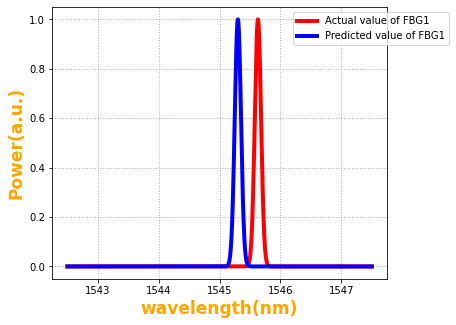

[0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.42154966e-291
 2.35769763e-292 3.90093698e-293]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
#np.linspace(1544.95,1549.95,1001);


x = np.linspace(1542.5,1547.5,2001);

FBG1_act=1*np.exp(-4*np.log(2)*((x-FBG1_act_LSTM)/(0.12))**2); #Actual central wavelength of FBg1
FBG2_act=0.59*np.exp(-4*np.log(2)*((x-FBG2_act_LSTM)/(0.12))**2);#Actual central wavelength of FBg2
FBG3_act=0.38*np.exp(-4*np.log(2)*((x-FBG3_act_LSTM)/(0.12))**2); #Actual central wavelength of FBg3
#FBG4_act=0.23*np.exp(-4*np.log(2)*((x-FBG4_act_LSTM)/(0.2))**2); #Actual central wavelength of FBg4
FBG1_pred=1*np.exp(-4*np.log(2)*((x-FBG1_LSTM)/(0.12))**2); #FBG1 Pridcited central wavelength
#FBG3_pred=0.25*np.exp(-4*np.log(2)*((x-FBG3_LSTM)/(0.2))**2); #FBG1 Pridcited central wavelength
#FBG4_pred=0.23*np.exp(-4*np.log(2)*((x-FBG4_LSTM)/(0.2))**2); #Actual central wavelength of FBg4
plt.figure(figsize=(6,5))
plt.plot(x,FBG1_act,label='Actual value of FBG1',linewidth=4, color='r')
plt.ylabel('Power(a.u.)', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')
plt.xlabel('wavelength(nm)', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')
plt.plot(x,FBG1_pred,label='Predicted value of FBG1',linewidth=4, color='b')
#plt.legend(loc='best')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off

#plt.xticks.labelsize:'100'
#plt.yticks.labelsize:'100'     
plt.grid(linestyle='dotted',linewidth=1);
plt.show()

print(FBG1_act)

No handles with labels found to put in legend.


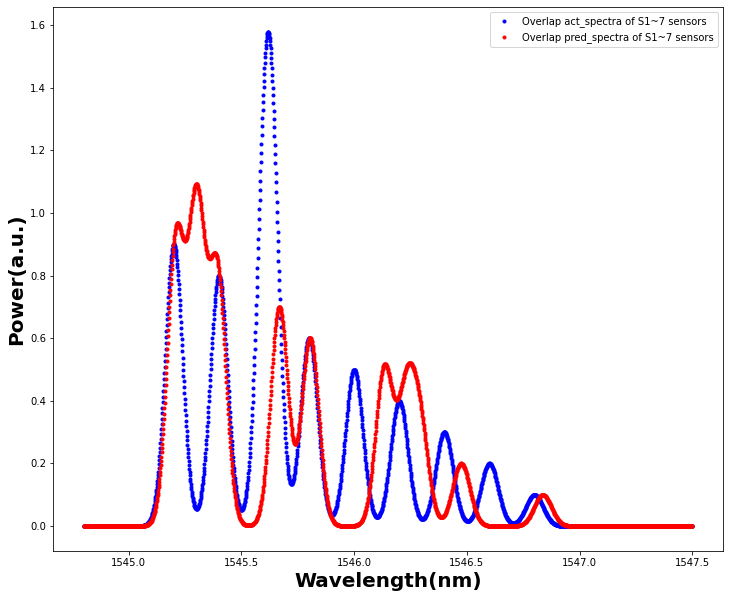

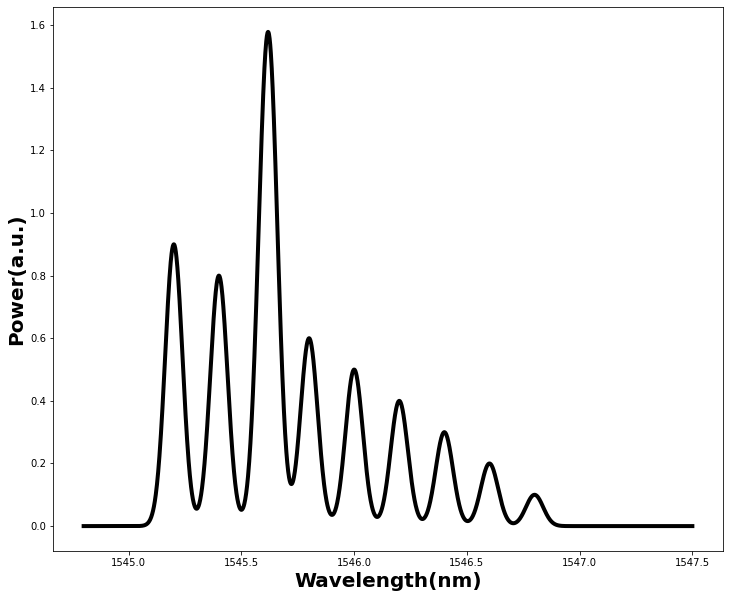

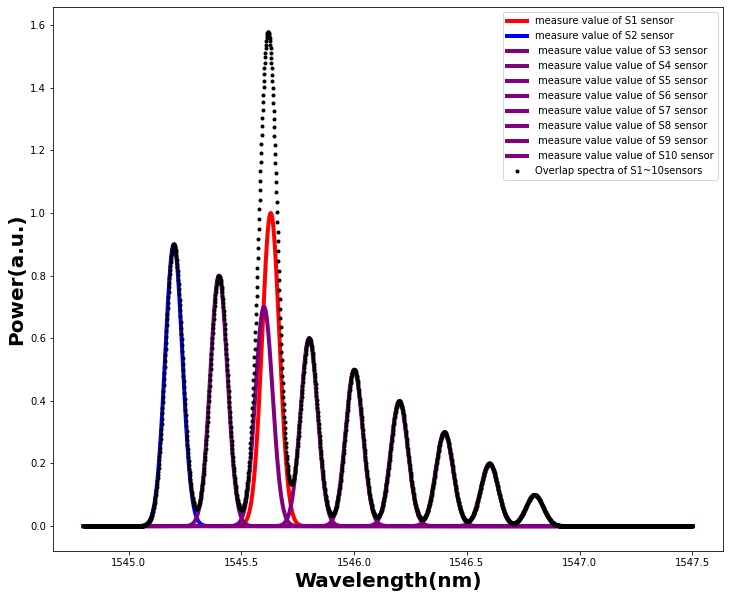

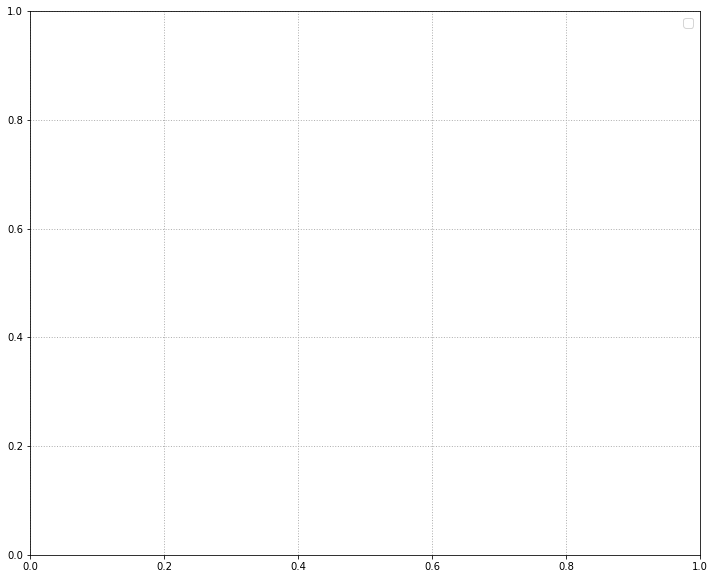

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#x = np.linspace(1544.95,1549.95,1001);
x = np.linspace(1544.8,1547.5,2001);

FBG1_act=1*np.exp(-4*np.log(2)*((x-FBG1_act_LSTM)/(0.09))**2); #Actual central wavelength of FBg1
FBG2_act=0.9*np.exp(-4*np.log(2)*((x-FBG2_act_LSTM)/(0.09))**2);#Actual central wavelength of FBg2
FBG3_act=0.8*np.exp(-4*np.log(2)*((x-FBG3_act_LSTM)/(0.09))**2); #Actual central wavelength of FBg3
FBG4_act=0.7*np.exp(-4*np.log(2)*((x-FBG4_act_LSTM)/(0.09))**2);#Actual central wavelength of FBg2
FBG5_act=0.6*np.exp(-4*np.log(2)*((x-FBG5_act_LSTM)/(0.09))**2); #Actual central wavelength of FBg3
FBG6_act=0.5*np.exp(-4*np.log(2)*((x-FBG6_act_LSTM)/(0.09))**2); #Actual central wavelength of FBg3
FBG7_act=0.4*np.exp(-4*np.log(2)*((x-FBG7_act_LSTM)/(0.09))**2); #Actual central wavelength of FBg3
FBG8_act=0.3*np.exp(-4*np.log(2)*((x-FBG8_act_LSTM)/(0.09))**2); #Actual central wavelength of FBg3
FBG9_act=0.2*np.exp(-4*np.log(2)*((x-FBG9_act_LSTM)/(0.09))**2); #Actual central wavelength of FBg3
FBG10_act=0.1*np.exp(-4*np.log(2)*((x-FBG10_act_LSTM)/(0.09))**2); #Actual central wavelength of FBg3
#FBG4_act=0.15*np.exp(-4*np.log(2)*((x-FBG4_act_LSTM)/(0.2))**2); #Actual central wavelength of FBg4
FBG1_pred=1*np.exp(-4*np.log(2)*((x-FBG1_LSTM)/(0.09))**2); #FBG1 Pridcited central wavelength
FBG2_pred=0.9*np.exp(-4*np.log(2)*((x-FBG2_LSTM)/(0.09))**2);#Actual central wavelength of FBg2
FBG3_pred=0.8*np.exp(-4*np.log(2)*((x-FBG3_LSTM)/(0.09))**2); #FBG1 Pridcited central wavelength
FBG4_pred=0.7*np.exp(-4*np.log(2)*((x-FBG4_LSTM)/(0.09))**2);#Actual central wavelength of FBg2
FBG5_pred=0.6*np.exp(-4*np.log(2)*((x-FBG5_LSTM)/(0.09))**2); #FBG1 Pridcited central wavelength
FBG6_pred=0.5*np.exp(-4*np.log(2)*((x-FBG6_LSTM)/(0.09))**2); #FBG1 Pridcited central wavelength
FBG7_pred=0.4*np.exp(-4*np.log(2)*((x-FBG7_LSTM)/(0.09))**2); #FBG1 Pridcited central wavelength
FBG8_pred=0.3*np.exp(-4*np.log(2)*((x-FBG8_LSTM)/(0.09))**2); #FBG1 Pridcited central wavelength
FBG9_pred=0.2*np.exp(-4*np.log(2)*((x-FBG9_LSTM)/(0.09))**2); #FBG1 Pridcited central wavelength
FBG10_pred=0.1*np.exp(-4*np.log(2)*((x-FBG10_LSTM)/(0.09))**2); #FBG1 Pridcited central wavelength
#FBG4_pred=0.15*np.exp(-4*np.log(2)*((x-FBG4_LSTM)/(0.2))**2); #Actual central wavelength of FBg4



overlap1=FBG1_act+FBG2_act+FBG3_act+FBG4_act+FBG5_act+FBG6_act+FBG7_act+FBG8_act+FBG9_act+FBG10_act;#overlap spectra of FBG1 ,FBG2 and FBG3
overlap2=FBG1_pred+FBG2_pred+FBG3_pred+FBG4_pred+FBG5_pred+FBG6_pred+FBG7_pred+FBG8_pred+FBG9_pred+FBG10_pred;#overlap spectra of FBG1 ,FBG2 and FBG3
plt.figure(figsize=(12,10))
plt.plot(x,overlap1,'.',label='Overlap act_spectra of S1~7 sensors',linewidth=8, color='BLUE')
plt.plot(x,overlap2,'.',label='Overlap pred_spectra of S1~7 sensors',linewidth=8, color='red')
plt.ylabel('Power(a.u.)', fontweight='bold',color = 'black', fontsize='20', horizontalalignment='center')
plt.xlabel('Wavelength(nm)', fontweight='bold', color = 'black', fontsize='20', horizontalalignment='center')
plt.legend(loc='upper right')

plt.figure(figsize=(12,10))


plt.plot(x,overlap1,label='act value of S1~10sensor',linewidth=4, color='black')
plt.ylabel('Power(a.u.)', fontweight='bold',color = 'black', fontsize='20', horizontalalignment='center')
plt.xlabel('Wavelength(nm)', fontweight='bold', color = 'black', fontsize='20', horizontalalignment='center')
#plt.plot(x,FBG2_act,label='act value of S2 sensor',linewidth=4, color='black')
#plt.plot(x,FBG3_act,label=' act value value of S3 sensor',linewidth=4, color='black')

plt.figure(figsize=(12,10))


#plt.plot(x,overlap2,'.',label='Overlap spectra of S1,S2 & S3 sensors',linewidth=8, color='black')


plt.plot(x,FBG1_act,label='measure value of S1 sensor',linewidth=4, color='r')

plt.ylabel('Power(a.u.)', fontweight='bold',color = 'black', fontsize='20', horizontalalignment='center')
plt.xlabel('Wavelength(nm)', fontweight='bold', color = 'black', fontsize='20', horizontalalignment='center')
plt.plot(x,FBG2_act,label='measure value of S2 sensor',linewidth=4, color='b')
plt.plot(x,FBG3_act,label=' measure value value of S3 sensor',linewidth=4, color='purple')
plt.plot(x,FBG4_act,label=' measure value value of S4 sensor',linewidth=4, color='purple')
plt.plot(x,FBG5_act,label=' measure value value of S5 sensor',linewidth=4, color='purple')
plt.plot(x,FBG6_act,label=' measure value value of S6 sensor',linewidth=4, color='purple')
plt.plot(x,FBG7_act,label=' measure value value of S7 sensor',linewidth=4, color='purple')
plt.plot(x,FBG8_act,label=' measure value value of S8 sensor',linewidth=4, color='purple')
plt.plot(x,FBG9_act,label=' measure value value of S9 sensor',linewidth=4, color='purple')
plt.plot(x,FBG10_act,label=' measure value value of S10 sensor',linewidth=4, color='purple')




plt.plot(x,overlap1,'.',label='Overlap spectra of S1~10sensors',linewidth=8, color='black')


#plt.plot(x,FBG1_pred,label='Measured value of S1 sensor',linewidth=4, color='r')
#plt.ylabel('Power(a.u.)', fontweight='bold',color = 'black', fontsize='20', horizontalalignment='center')
#plt.xlabel('Wavelength(nm)', fontweight='bold', color = 'black', fontsize='20', horizontalalignment='center')
#plt.plot(x,FBG2_pred,label='Measured value of S2 sensor',linewidth=4, color='b')
#plt.plot(x,FBG3_pred,label=' Measured value of S3 sensor',linewidth=4, color='purple')
#plt.plot(x,FBG4_act,label=' Measured value of S4 sensor',linewidth=4, color='green')

#plt.legend(loc='upper right')
plt.legend(loc='upper right')

plt.figure(figsize=(12,10))


plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off

#plt.xticks.labelsize:'100'
#plt.yticks.labelsize:'100' 
plt.grid(linestyle='dotted',linewidth=1);
plt.legend(fontsize=13)
#plt.xlabel.titlesize= 100
#plt.xlabel.labelsize= 100
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=20) 
plt.show()

